In [ ]:
# Data Science for Business 1: Group Assignment

# Importing data from Kaggle
import kagglehub
import pandas as pd
import os

# Downloading the latest version of the Formula 1 World Championship dataset (For some reason the url states only year 1950-2020, but the dataset has been updated to 2024)
path = kagglehub.dataset_download("rohanrao/formula-1-world-championship-1950-2020")


Using Colab cache for faster access to the 'formula-1-world-championship-1950-2020' dataset.


# Data processing


*   Cleaning each table
*   Feature selection
*   Combine data




In [ ]:
# Loading all the tables
import numpy as np
print("Path to dataset files:", path)

races = pd.read_csv(os.path.join(path, "races.csv"))
drivers = pd.read_csv(os.path.join(path, "drivers.csv"))
results = pd.read_csv(os.path.join(path, "results.csv"))
circuits = pd.read_csv(os.path.join(path, "circuits.csv"))

# Replacing SQL-null values to nan values
tables = [races, drivers, results, circuits]
for table in tables:
  table.replace('\\N', np.nan, inplace=True)


print(results.shape, drivers.shape, circuits.shape, races.shape)
results.head(3)

Path to dataset files: /kaggle/input/formula-1-world-championship-1950-2020
(26759, 18) (861, 9) (77, 9) (1125, 18)


resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3       1:27.739         217.586         1  
2         41    5       1:28.090         216.719         1

## Races table

Relevant columns:


*   raceID: id of race
*   year: Year
*   round: Race number
*   circuitId: id of circuit
*   name: Name of circuit



In [ ]:
# Basic info about races table
races.info()
races.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1125 non-null   int64 
 1   year         1125 non-null   int64 
 2   round        1125 non-null   int64 
 3   circuitId    1125 non-null   int64 
 4   name         1125 non-null   object
 5   date         1125 non-null   object
 6   time         394 non-null    object
 7   url          1125 non-null   object
 8   fp1_date     90 non-null     object
 9   fp1_time     68 non-null     object
 10  fp2_date     90 non-null     object
 11  fp2_time     68 non-null     object
 12  fp3_date     72 non-null     object
 13  fp3_time     53 non-null     object
 14  quali_date   90 non-null     object
 15  quali_time   68 non-null     object
 16  sprint_date  18 non-null     object
 17  sprint_time  15 non-null     object
dtypes: int64(4), object(14)
memory usage: 158.3+ KB


/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.12/di

raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...      NaN   
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...      NaN   
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...      NaN   
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...      NaN   
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...      NaN   

  fp1_time fp2_date fp2_time fp3_date fp3_time quali_date quali_time  \
0      NaN      NaN      NaN      NaN      NaN        NaN        NaN   
1      NaN      NaN      NaN      NaN      NaN        NaN        NaN   
2      NaN      NaN      NaN      NaN      NaN        NaN        NaN   
3      NaN      NaN      NaN      NaN      NaN        NaN        NaN   
4      NaN      NaN      NaN      NaN      NaN        NaN        NaN   

  sprint_date sprint_time  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN

In [ ]:
# Making a new table with relevant columns

races1 = races[['raceId', 'year', 'round', 'date', 'circuitId', 'name']].copy()

races1.info()
races1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1125 non-null   int64 
 1   year       1125 non-null   int64 
 2   round      1125 non-null   int64 
 3   date       1125 non-null   object
 4   circuitId  1125 non-null   int64 
 5   name       1125 non-null   object
dtypes: int64(4), object(2)
memory usage: 52.9+ KB


raceId  year  round        date  circuitId                   name
0       1  2009      1  2009-03-29          1  Australian Grand Prix
1       2  2009      2  2009-04-05          2   Malaysian Grand Prix
2       3  2009      3  2009-04-19         17     Chinese Grand Prix
3       4  2009      4  2009-04-26          3     Bahrain Grand Prix
4       5  2009      5  2009-05-10          4     Spanish Grand Prix

In [ ]:
# Checking if there is null values and duplicates
print("Number of duplicates:", races1.duplicated(subset='raceId').sum())

races1.isna().sum()

Number of duplicates: 0


raceId       0
year         0
round        0
date         0
circuitId    0
name         0
dtype: int64

In [ ]:
# Cleaned table looks like:
print(races1.head(3))
print(races1.tail(3))
races1.shape

   raceId  year  round        date  circuitId                   name
0       1  2009      1  2009-03-29          1  Australian Grand Prix
1       2  2009      2  2009-04-05          2   Malaysian Grand Prix
2       3  2009      3  2009-04-19         17     Chinese Grand Prix
      raceId  year  round        date  circuitId                  name
1122    1142  2024     22  2024-11-23         80  Las Vegas Grand Prix
1123    1143  2024     23  2024-12-01         78      Qatar Grand Prix
1124    1144  2024     24  2024-12-08         24  Abu Dhabi Grand Prix


(1125, 6)

## Drivers table

Relevant columns:
*  driverId: Id
*  driverRef: Reference name of driver
*  dob: Date of birth (for counting age?)


In [ ]:
drivers.info()
drivers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     861 non-null    int64 
 1   driverRef    861 non-null    object
 2   number       59 non-null     object
 3   code         104 non-null    object
 4   forename     861 non-null    object
 5   surname      861 non-null    object
 6   dob          861 non-null    object
 7   nationality  861 non-null    object
 8   url          861 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.7+ KB


driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld    NaN  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen    NaN  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen

In [ ]:
# New table with relevant columns
drivers1 = drivers[['driverId', 'driverRef', 'code', 'dob']].copy()

# Cleaning text columns
drivers1['driverRef'] = drivers1['driverRef'].astype(str).str.strip()
drivers1['code'] = drivers1['code'].astype(str).str.strip()

# date of birth column to datetime

drivers1['dob'] = pd.to_datetime(drivers1['dob'], errors='coerce')

drivers1.info()
drivers1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   driverId   861 non-null    int64         
 1   driverRef  861 non-null    object        
 2   code       861 non-null    object        
 3   dob        861 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 27.0+ KB


driverId   driverRef code        dob
0         1    hamilton  HAM 1985-01-07
1         2    heidfeld  HEI 1977-05-10
2         3     rosberg  ROS 1985-06-27
3         4      alonso  ALO 1981-07-29
4         5  kovalainen  KOV 1981-10-19

In [ ]:
drivers1.isna().sum()

driverId     0
driverRef    0
code         0
dob          0
dtype: int64

In [ ]:
# Cleaned drivers table

print(drivers1.head(3))
print(drivers1.tail(3))
print(drivers1.shape)


   driverId driverRef code        dob
0         1  hamilton  HAM 1985-01-07
1         2  heidfeld  HEI 1977-05-10
2         3   rosberg  ROS 1985-06-27
     driverId  driverRef code        dob
858       860    bearman  BEA 2005-05-08
859       861  colapinto  COL 2003-05-27
860       862     doohan  DOO 2003-01-20
(861, 4)


## Circuits table

Relevant columns
* circuitID: Id
* circuitRef: Reference name of circuit
* name: Actual name of circuit
* country: Country


In [ ]:
# new table with relevant columns

circuits1 = circuits[['circuitId', 'circuitRef', 'name', 'country']].copy()

# Strip spaces and unify data type
text_cols = ['circuitRef', 'name', 'country']
circuits1[text_cols] = circuits1[text_cols].astype(str).apply(lambda x: x.str.strip())

circuits1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   circuitId   77 non-null     int64 
 1   circuitRef  77 non-null     object
 2   name        77 non-null     object
 3   country     77 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.5+ KB


## Results table

*** Kaikki kierroaikoihin liittyvät sarakkeet sisäls tosi paljo puuttuvaa dataa, niin ne ei oo siks mukana***

Relevant columns:
* resultId: Id
* raceId: Id of race
* driverId: id of driver
* constructorId: id of constructor
* grid: position in starting grid
* positionOrder: final rank
* laps: Laps completed

In [ ]:
# New table with relevant columns
results1 = results[['raceId', 'driverId', 'constructorId', 'grid',
                    'positionOrder','laps']].copy()




results1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   raceId         26759 non-null  int64
 1   driverId       26759 non-null  int64
 2   constructorId  26759 non-null  int64
 3   grid           26759 non-null  int64
 4   positionOrder  26759 non-null  int64
 5   laps           26759 non-null  int64
dtypes: int64(6)
memory usage: 1.2 MB


In [ ]:
results1.isna().sum()

raceId           0
driverId         0
constructorId    0
grid             0
positionOrder    0
laps             0
dtype: int64

In [ ]:
# creating a binary podium column, this will be the classification target
results1['podium'] = results1['positionOrder'].apply(lambda x: 1 if x <= 3 else 0)

results1.head()

raceId  driverId  constructorId  grid  positionOrder  laps  podium
0      18         1              1     1              1    58       1
1      18         2              2     5              2    58       1
2      18         3              3     7              3    58       1
3      18         4              4    11              4    58       0
4      18         5              1     3              5    58       0

## Combining all the tables into one dataframe


In [ ]:
# Results is the core table, because each row is one driver in one race

df_combined = results1.copy()

# Merge with races
df_combined = df_combined.merge(races1, on='raceId', how='left')

# Merge with drivers
df_combined = df_combined.merge(drivers1, on='driverId', how='left')

# Merge with circuits
df_combined = df_combined.merge(circuits1, on='circuitId', how='left', suffixes=('', '_circuit'))

# Adding driver age
df_combined['dob'] = pd.to_datetime(df_combined['dob'], errors='coerce')
df_combined['date'] = pd.to_datetime(df_combined['date'], errors='coerce')

df_combined['driver_age'] = ((df_combined['date'] - df_combined['dob']).dt.days / 365.25).astype(int)

df_combined.info()

df_combined.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   raceId         26759 non-null  int64         
 1   driverId       26759 non-null  int64         
 2   constructorId  26759 non-null  int64         
 3   grid           26759 non-null  int64         
 4   positionOrder  26759 non-null  int64         
 5   laps           26759 non-null  int64         
 6   podium         26759 non-null  int64         
 7   year           26759 non-null  int64         
 8   round          26759 non-null  int64         
 9   date           26759 non-null  datetime64[ns]
 10  circuitId      26759 non-null  int64         
 11  name           26759 non-null  object        
 12  driverRef      26759 non-null  object        
 13  code           26759 non-null  object        
 14  dob            26759 non-null  datetime64[ns]
 15  circuitRef     2675

raceId  driverId  constructorId  grid  positionOrder  laps  podium  year  \
0      18         1              1     1              1    58       1  2008   
1      18         2              2     5              2    58       1  2008   
2      18         3              3     7              3    58       1  2008   
3      18         4              4    11              4    58       0  2008   
4      18         5              1     3              5    58       0  2008   
5      18         6              3    13              6    57       0  2008   
6      18         7              5    17              7    55       0  2008   
7      18         8              6    15              8    53       0  2008   
8      18         9              2     2              9    47       0  2008   
9      18        10              7    18             10    43       0  2008   

   round       date  circuitId                   name   driverRef code  \
0      1 2008-03-16          1  Australian Grand Prix    hamilton  HAM   
1      1 2008-03-16          1  Australian Grand Prix    heidfeld  HEI   
2      1 2008-03-16          1  Australian Grand Prix     rosberg  ROS   
3      1 2008-03-16          1  Australian Grand Prix      alonso  ALO   
4      1 2008-03-16          1  Australian Grand Prix  kovalainen  KOV   
5      1 2008-03-16          1  Australian Grand Prix    nakajima  NAK   
6      1 2008-03-16          1  Australian Grand Prix    bourdais  BOU   
7      1 2008-03-16          1  Australian Grand Prix   raikkonen  RAI   
8      1 2008-03-16          1  Australian Grand Prix      kubica  KUB   
9      1 2008-03-16          1  Australian Grand Prix       glock  GLO   

         dob   circuitRef                    name_circuit    country  \
0 1985-01-07  albert_park  Albert Park Grand Prix Circuit  Australia   
1 1977-05-10  albert_park  Albert Park Grand Prix Circuit  Australia   
2 1985-06-27  albert_park  Albert Park Grand Prix Circuit  Australia   
3 1981-07-29  albert_park  Albert Park Grand Prix Circuit  Australia   
4 1981-10-19  albert_park  Albert Park Grand Prix Circuit  Australia   
5 1985-01-11  albert_park  Albert Park Grand Prix Circuit  Australia   
6 1979-02-28  albert_park  Albert Park Grand Prix Circuit  Australia   
7 1979-10-17  albert_park  Albert Park Grand Prix Circuit  Australia   
8 1984-12-07  albert_park  Albert Park Grand Prix Circuit  Australia   
9 1982-03-18  albert_park  Albert Park Grand Prix Circuit  Australia   

   driver_age  
0          23  
1          30  
2          22  
3          26  
4          26  
5          23  
6          29  
7          28  
8          23  
9          25

In [ ]:
df_combined['year'].unique()

array([2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 2009, 1989, 1988,
       1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966,
       1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955,
       1954, 1953, 1952, 1951, 1950, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

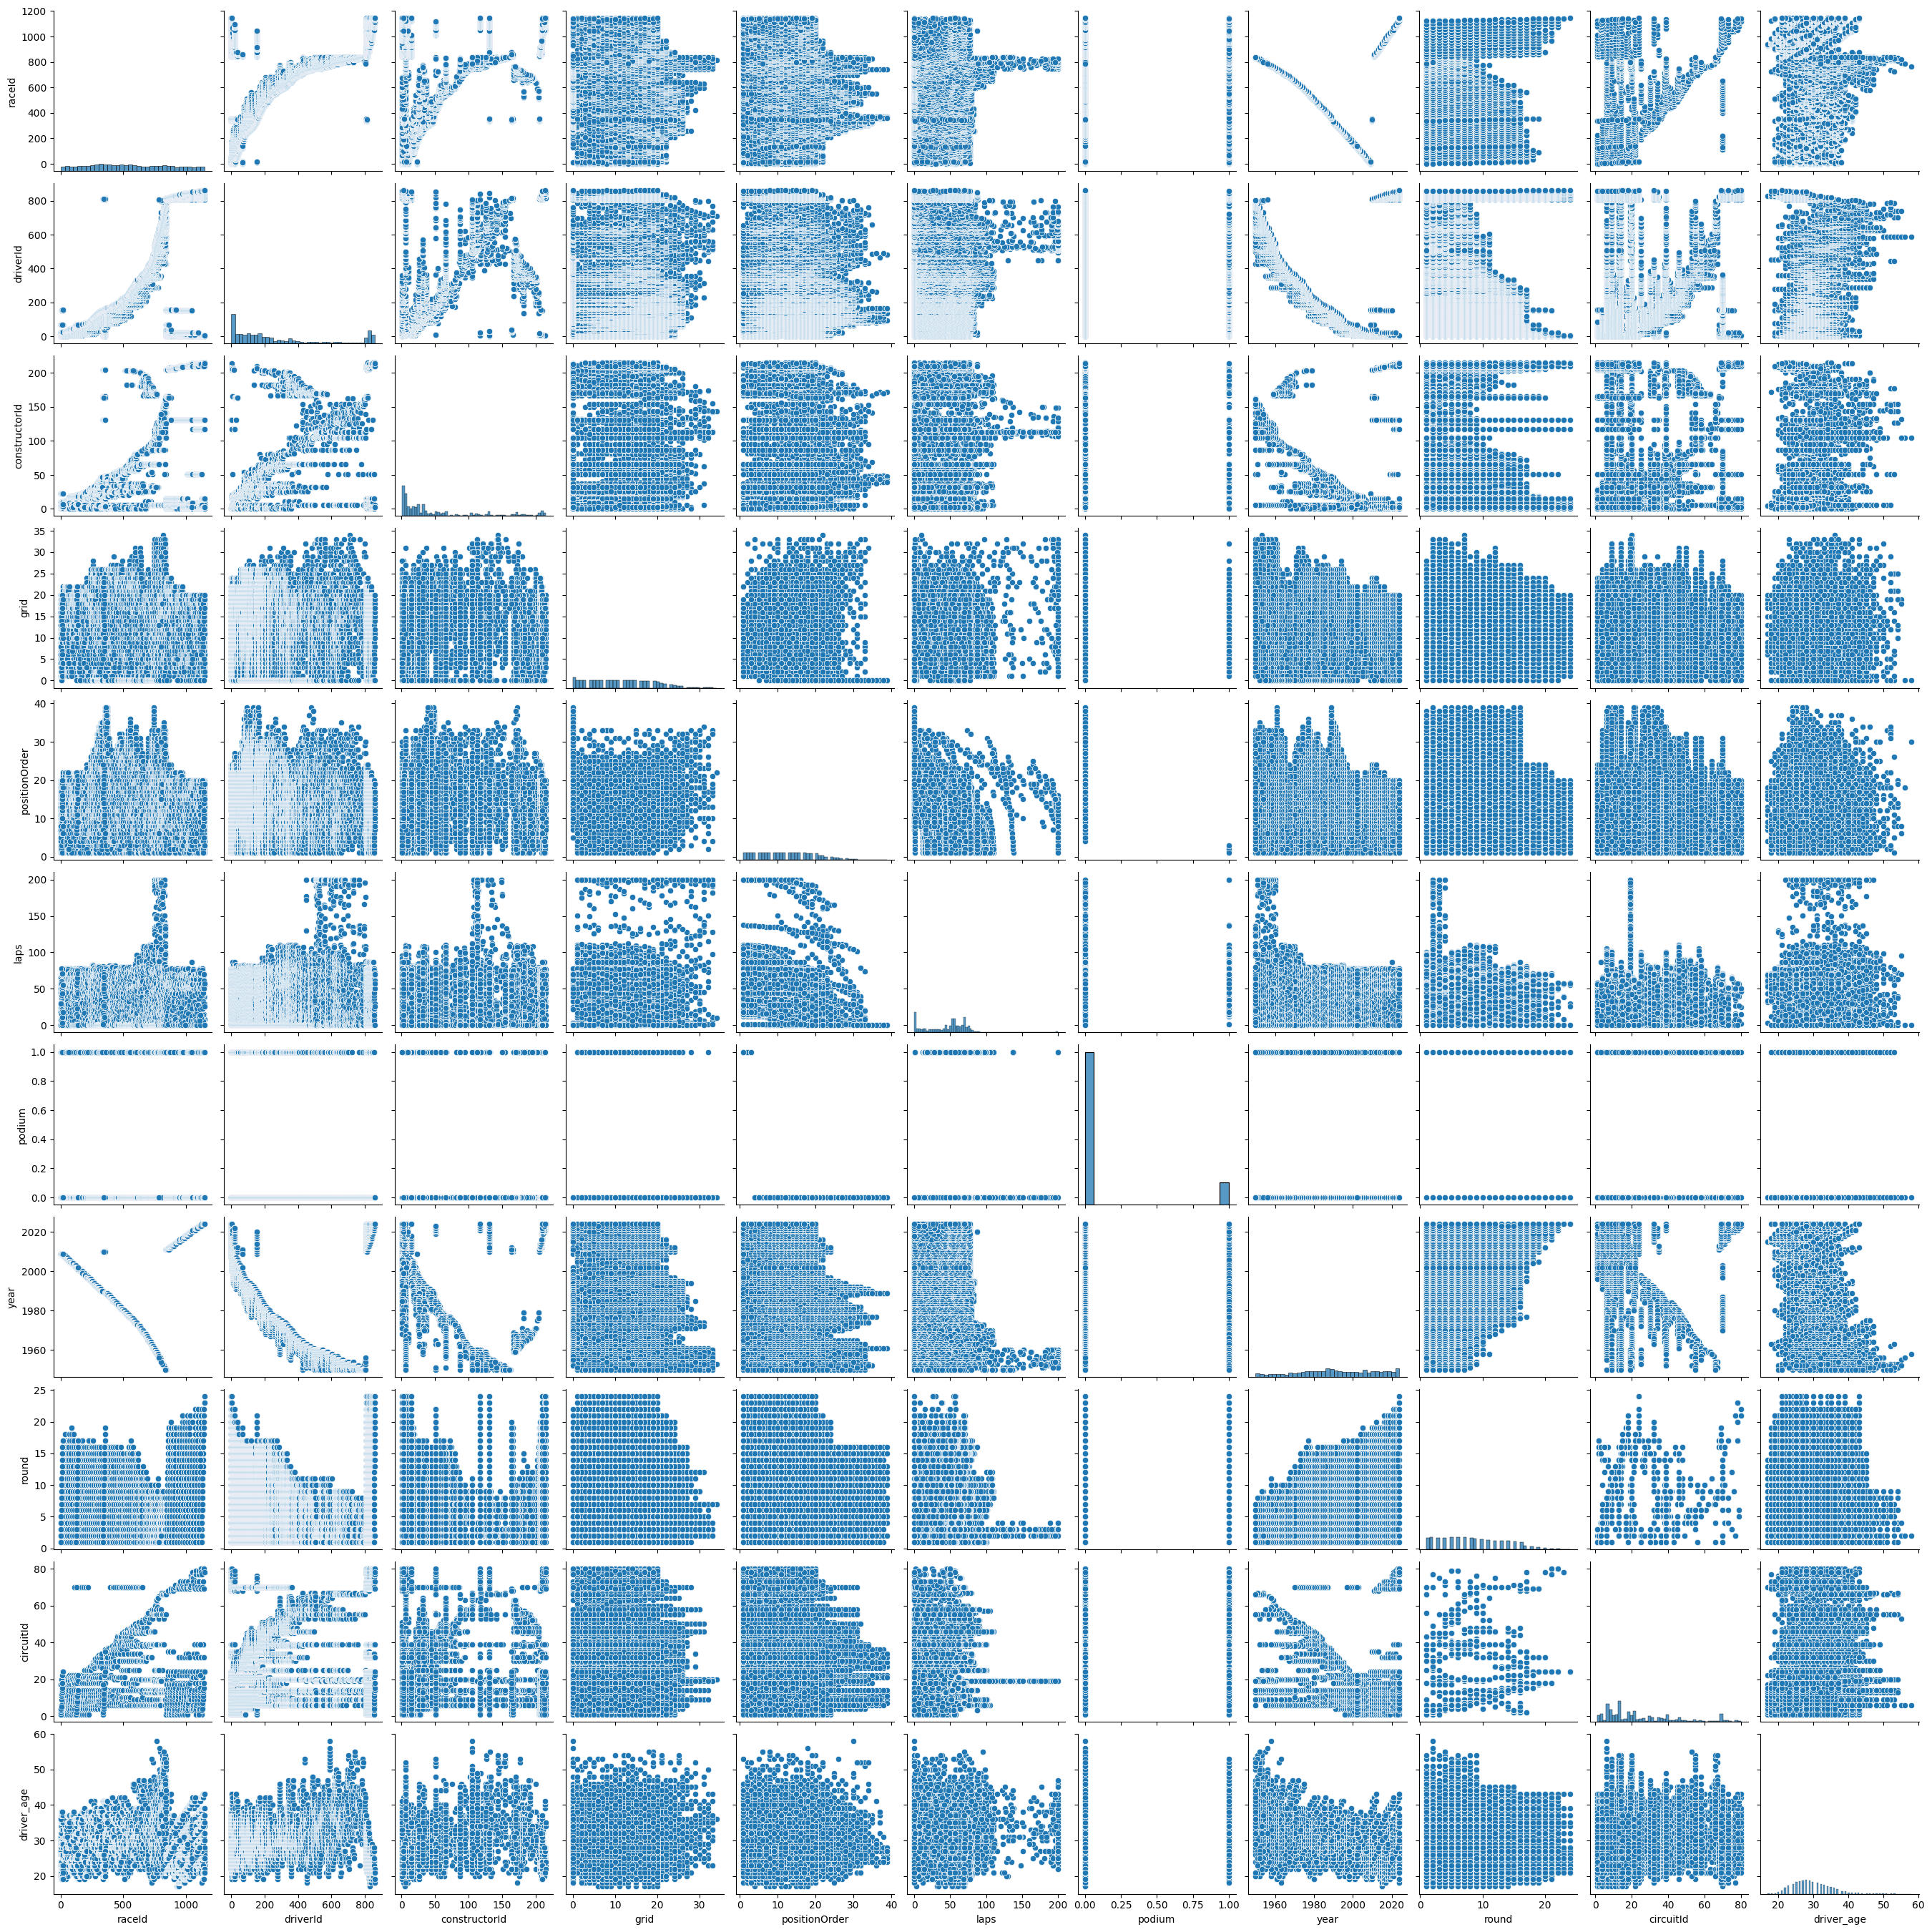

In [ ]:
df_filtered = df_combined.sort_values(["driverId","year", "round"]).reset_index(drop=True)

# Get only needed years
df = df_filtered[df_filtered["year"] >= 2014] # <- 2014 was the year that f1 entered the hybrid-era (rapsaan jotain tästä, että ajanjaksojen välillä voimasuhteet muuttuu vahvasti, joten tämä luonnollinen kohta jakaa data)

df_filtered.head(10)

import seaborn as sns

sns.pairplot(df_filtered)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   raceId         26759 non-null  int64         
 1   driverId       26759 non-null  int64         
 2   constructorId  26759 non-null  int64         
 3   grid           26759 non-null  int64         
 4   positionOrder  26759 non-null  int64         
 5   laps           26759 non-null  int64         
 6   podium         26759 non-null  int64         
 7   year           26759 non-null  int64         
 8   round          26759 non-null  int64         
 9   date           26759 non-null  datetime64[ns]
 10  circuitId      26759 non-null  int64         
 11  name           26759 non-null  object        
 12  driverRef      26759 non-null  object        
 13  code           26759 non-null  object        
 14  dob            26759 non-null  datetime64[ns]
 15  circuitRef     2675

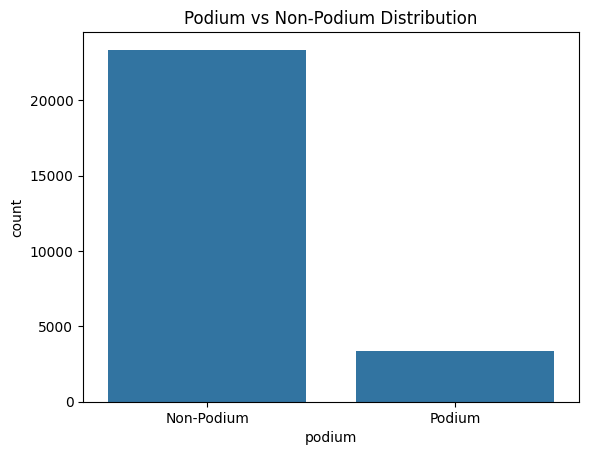

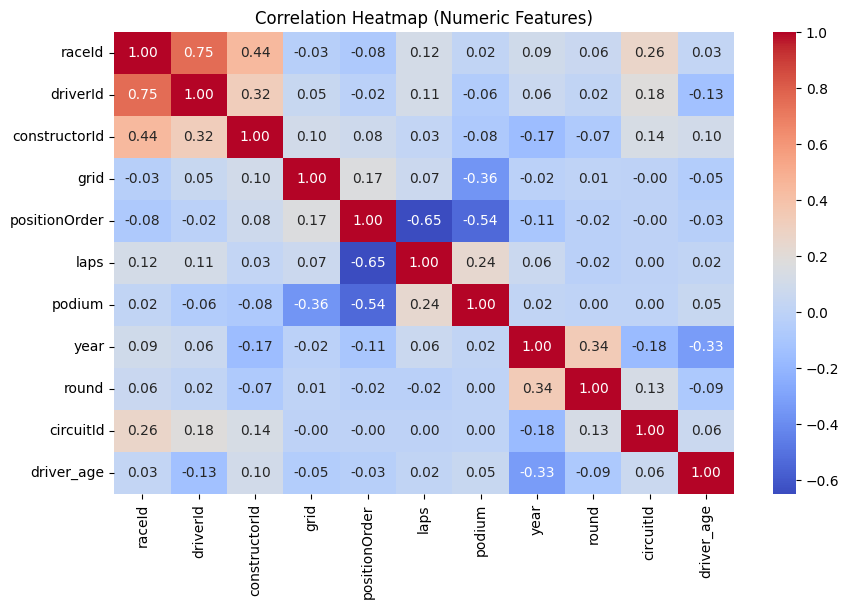

In [ ]:
# EDA on the unified dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Basic info and summary

print(df_filtered.info())
print(df_filtered.describe().T)

# Class balance
print(df_filtered['podium'].value_counts(normalize=True))

sns.countplot(x='podium', data=df_filtered)
plt.title("Podium vs Non-Podium Distribution")
plt.xticks([0, 1], ['Non-Podium', 'Podium'])
plt.show()


# Correlation heatmap
numeric_cols = df_filtered.select_dtypes(include=['int64', 'float64']).columns
corr = df_filtered[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


# Feature Engineering and train/test splitting






Because this is timeseries data, we are going to be training the model with data from 2014 to 2021 and leaving years 2022 and 2023 for validation and 2024 for testing the final model.



In [ ]:
def add_mvp_rolling_features(df, windows=(3, 5, 10, 15, 20, 50)):
    """
    Making the rolling average features for training the model.
    Taking the average (or sum of podiums) for the last x different races.
    All of the variables are shifted back by one so we assume no knowledge of the current race.
    Assuming past race and grid position of 20 for new drivers
    """
    df = df.copy()
    df = df.sort_values(["driverId", "year", "round"])

    feature_cols = []

    for w in windows:
        # Past podium count (sum over last w past races)
        df[f"prev_podiums_w{w}"] = (
            df.groupby("driverId")["podium"]
              .transform(lambda s: s.shift(1).rolling(window=w, min_periods=1).sum())
              .fillna(0)
        )

        feature_cols.append(f"prev_podiums_w{w}")

        # Past average grid
        df[f"avg_grid_pos_w{w}"] = (
            df.groupby("driverId")["grid"]
              .transform(lambda s: s.shift(1).rolling(window=w, min_periods=1).mean())
              .fillna(20) # <- lets assume new drivers average is back of the grid
        )

        feature_cols.append(f"avg_grid_pos_w{w}")

        # Past average finish position
        df[f"avg_finish_pos_w{w}"] = (
            df.groupby("driverId")["positionOrder"]
              .transform(lambda s: s.shift(1).rolling(window=w, min_periods=1).mean())
              .fillna(20) # <- lets assume new drivers average is back of the grid
        )

        feature_cols.append(f"avg_finish_pos_w{w}")



    return df, feature_cols

df, feature_cols = add_mvp_rolling_features(df_filtered)

In [ ]:
df = df.sort_values(["year", "round"]).reset_index(drop=True) # <- needed for correct timewise split

feature_cols.append("year")
feature_cols.append("driver_age")

#Train/validation/test splits:
train_df = df[df["year"] < 2022]
val_df   = df[(df["year"] == 2022) | (df["year"] == 2023)]
test_df  = df[df["year"] == 2024]

X_train = train_df[feature_cols]
y_train = train_df["podium"]

X_val = val_df[feature_cols]
y_val = val_df["podium"]

X_test = test_df[feature_cols]
y_test = test_df["podium"]

# Model building


Models to consider:
* Logistic Regression
* Ridge Regression
* XgBoost
* RandomForest

Test and evaluate all models.

In [ ]:
# Hyperparameter (C) optimization for Ridge and Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Smaller C = stronger regularization
C_GRID = np.logspace(-4, 4, 9) # [1e-4, 1e-3, ..., 1e4]

best_C, best_score, best_model = None, -1, None

for c in C_GRID:
    m = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(
            C=c, penalty='l1', solver='liblinear', class_weight='balanced', max_iter=1000, random_state=42
        ))
    ])
    m.fit(X_train, y_train)
    pred = m.predict(X_val)
    from sklearn.metrics import f1_score
    score = f1_score(y_val, pred)
    if score > best_score:
        best_score, best_C, best_model = score, c, m

print(f"For LASSO C={best_C}, F1={best_score:.3f}")

best_C, best_score, best_model = None, -1, None

for c in C_GRID:
    m = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(
            C=c, penalty='l2', solver='liblinear', class_weight='balanced', max_iter=1000, random_state=42
        ))
    ])
    m.fit(X_train, y_train)
    pred = m.predict(X_val)
    score = f1_score(y_val, pred)
    if score > best_score:
        best_score, best_C, best_model = score, c, m

print(f"For Ridge C={best_C}, F1={best_score:.3f}")


For LASSO C=0.1, F1=0.565
For Ridge C=0.01, F1=0.567


In [ ]:
# Required imports
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

pos_ratio = (y_train==0).sum() / (y_train==1).sum()

# Define models with class balancing
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
    ]),

    "Logistic Regression, Lasso": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(C=0.1, penalty='l1', solver='liblinear',class_weight='balanced', max_iter=1000, random_state=42))
    ]),

    "Logistic Regression, Ridge": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(C=0.1, penalty='l2', solver='lbfgs',class_weight='balanced', max_iter=1000, random_state=42))
        ]),
    "Random Forest": RandomForestClassifier(n_estimators=500, class_weight='balanced_subsample', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=pos_ratio)
}


=== Logistic Regression ===
              precision    recall  f1-score   support

           0      0.973     0.779     0.866       748
           1      0.413     0.879     0.562       132

    accuracy                          0.794       880
   macro avg      0.693     0.829     0.714       880
weighted avg      0.889     0.794     0.820       880


=== Logistic Regression, Lasso ===
              precision    recall  f1-score   support

           0      0.975     0.779     0.866       748
           1      0.415     0.886     0.565       132

    accuracy                          0.795       880
   macro avg      0.695     0.833     0.716       880
weighted avg      0.891     0.795     0.821       880


=== Logistic Regression, Ridge ===
              precision    recall  f1-score   support

           0      0.973     0.778     0.865       748
           1      0.411     0.879     0.560       132

    accuracy                          0.793       880
   macro avg      0.692    

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:25:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
              precision    recall  f1-score   support

           0      0.923     0.870     0.896       748
           1      0.446     0.591     0.508       132

    accuracy                          0.828       880
   macro avg      0.685     0.731     0.702       880
weighted avg      0.852     0.828     0.838       880



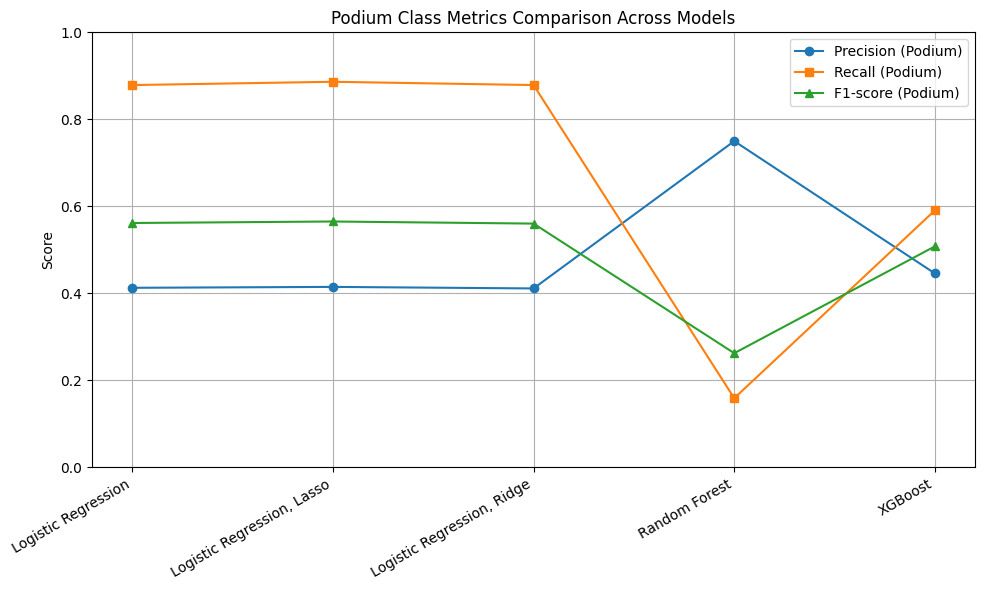

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Store metrics for plotting
metrics = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1': []
}

# Loop through models and collect metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Append metrics for the podium class (1)
    metrics['Model'].append(name)
    metrics['Precision'].append(precision_score(y_val, y_pred, pos_label=1))
    metrics['Recall'].append(recall_score(y_val, y_pred, pos_label=1))
    metrics['F1'].append(f1_score(y_val, y_pred, pos_label=1))

    # Print classification report
    print(f"\n=== {name} ===")
    print(classification_report(y_val, y_pred, digits=3))

# ===========================
# Plot comparison
# ===========================
x = range(len(metrics['Model']))
plt.figure(figsize=(10,6))
plt.plot(x, metrics['Precision'], marker='o', label='Precision (Podium)')
plt.plot(x, metrics['Recall'], marker='s', label='Recall (Podium)')
plt.plot(x, metrics['F1'], marker='^', label='F1-score (Podium)')

plt.xticks(x, metrics['Model'], rotation=30, ha='right')
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Podium Class Metrics Comparison Across Models")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#XGBoost seems to be the overall best model.
#It generalizes better, balances precision and recall more effectively, and avoids the over-sensitivity of the logistic models that over-predict podiums.


In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

# Lets now evaluate our chosen model with the test sample
model = models["Logistic Regression, Lasso"]

# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Use precision-recall curve to find the optimal threshold
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Compute F1 for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

# Find threshold that maximizes F1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Best threshold (max F1): {best_threshold:.3f}")
print(f"F1 at best threshold: {f1_scores[best_idx]:.3f}")

# Apply the threshold to make predictions
y_pred_thresh = (y_probs >= best_threshold).astype(int)

# Evaluate performance
from sklearn.metrics import classification_report
print("\nClassification report with tuned threshold:")
print(classification_report(y_test, y_pred_thresh, digits=3))



Best threshold (max F1): 0.709
F1 at best threshold: 0.594

Classification report with tuned threshold:
              precision    recall  f1-score   support

           0      0.940     0.892     0.916       407
           1      0.527     0.681     0.594        72

    accuracy                          0.860       479
   macro avg      0.734     0.786     0.755       479
weighted avg      0.878     0.860     0.867       479



In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

# Lets now evaluate our chosen model with the test sample
model = models["XGBoost"]

# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Use precision-recall curve to find the optimal threshold
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Compute F1 for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

# Find threshold that maximizes F1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Best threshold (max F1): {best_threshold:.3f}")
print(f"F1 at best threshold: {f1_scores[best_idx]:.3f}")

# Apply the threshold to make predictions
y_pred_thresh = (y_probs >= best_threshold).astype(int)

# Evaluate performance
from sklearn.metrics import classification_report
print("\nClassification report with tuned threshold:")
print(classification_report(y_test, y_pred_thresh, digits=3))


Best threshold (max F1): 0.401
F1 at best threshold: 0.603

Classification report with tuned threshold:
              precision    recall  f1-score   support

           0      0.959     0.853     0.902       407
           1      0.487     0.792     0.603        72

    accuracy                          0.843       479
   macro avg      0.723     0.822     0.753       479
weighted avg      0.888     0.843     0.857       479



=== XGBoost Classification Report ===
              precision    recall  f1-score   support

           0      0.959     0.853     0.902       407
           1      0.487     0.792     0.603        72

    accuracy                          0.843       479
   macro avg      0.723     0.822     0.753       479
weighted avg      0.888     0.843     0.857       479



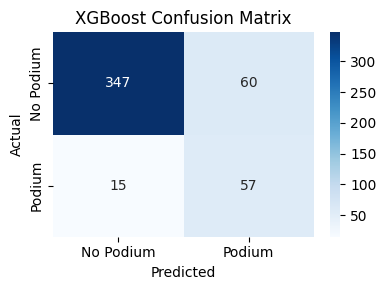

<Figure size 800x600 with 0 Axes>

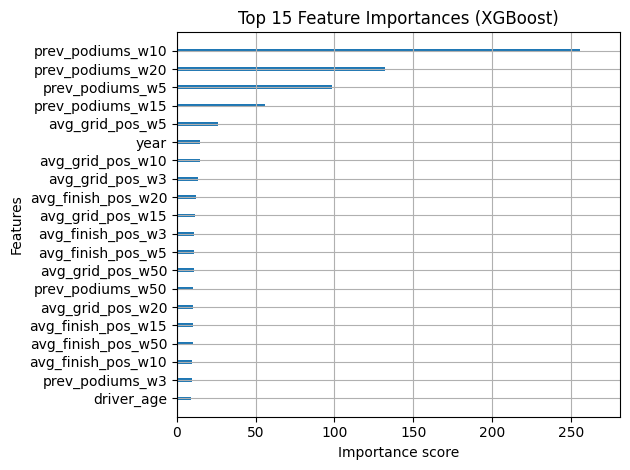

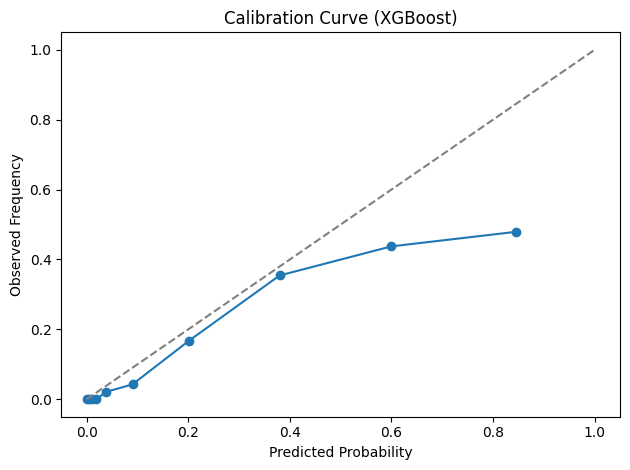

In [ ]:
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# XGBoost visualizations

# Predictions & confusion matrix
y_probs = models["XGBoost"].predict_proba(X_test)[:, 1]
y_pred = (y_probs >= best_threshold).astype(int)   # Used the Best Threshold (max F1)

cm = confusion_matrix(y_test, y_pred)
print("=== XGBoost Classification Report ===")
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Podium', 'Podium'],   # Predicted
            yticklabels=['No Podium', 'Podium'])   # Actual
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.tight_layout()
plt.show()

# Feature importance plot
plt.figure(figsize=(8,6))
plot_importance(models["XGBoost"], importance_type='gain',
                max_num_features=25, show_values=False)
plt.title("Top 15 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10, strategy='quantile')

plt.figure()
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Frequency')
plt.title('Calibration Curve (XGBoost)')
plt.tight_layout()
plt.show()
